In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2698 - acc: 0.9167 - val_loss: 0.0595 - val_acc: 0.9806
Epoch 2/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0904 - acc: 0.9733 - val_loss: 0.0397 - val_acc: 0.9865
Epoch 3/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0670 - acc: 0.9804 - val_loss: 0.0360 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0557 - acc: 0.9832 - val_loss: 0.0316 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0468 - acc: 0.9861 - val_loss: 0.0281 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0418 - acc: 0.9870 - val_loss: 0.0309 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================

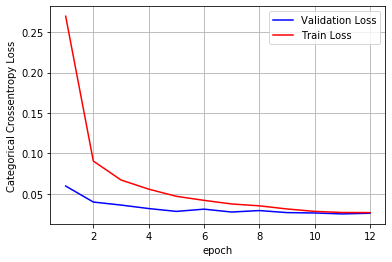

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
## assignment

# **Assignment**

# **3 LAYER**

## 3 LAYER OF CNN WITHOUT POOLING AND DROPOUT and batch norm

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history= model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.1827 - acc: 0.9432 - val_loss: 0.0548 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0483 - acc: 0.9851 - val_loss: 0.0345 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0308 - acc: 0.9902 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0213 - acc: 0.9935 - val_loss: 0.0434 - val_acc: 0.9859
Epoch 5/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0160 - acc: 0.9953 - val_loss: 0.0293 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0304 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0085 - acc: 0.9975 - val_loss: 0.0315 - val_ac

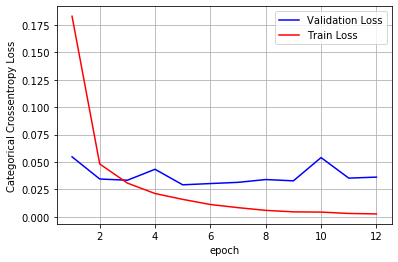

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3 LAYER OF CNN WITh POOLING AND without DROPOUT 

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.1806 - acc: 0.9441 - val_loss: 0.0589 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0325 - val_acc: 0.9884
Epoch 3/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 4/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0301 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.0144 - acc: 0.9953 - val_loss: 0.0327 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0286 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0073 - acc: 0.9976 - val_loss: 0.0331 - val_ac

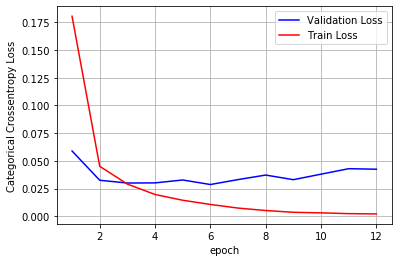

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
## 3 LAYER OF CNN WITh POOLING AND without DROPOUT 

## 3 LAYER OF CNN WITh POOLING AND with DROPOUT 

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 125us/step - loss: 0.2545 - acc: 0.9211 - val_loss: 0.0543 - val_acc: 0.9821
Epoch 2/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0844 - acc: 0.9753 - val_loss: 0.0370 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0628 - acc: 0.9814 - val_loss: 0.0307 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0263 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0455 - acc: 0.9865 - val_loss: 0.0246 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0399 - acc: 0.9886 - val_loss: 0.0248 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0363 - acc: 0.9889 - val_loss: 0.0235 - val_ac

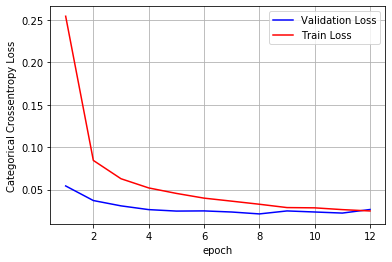

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 CNN LAYER

## 5 LAYER CNN WITHOUT POOL AND DROPOUT

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(32, (2, 2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.2313 - acc: 0.9296 - val_loss: 0.0646 - val_acc: 0.9781
Epoch 2/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0513 - acc: 0.9839 - val_loss: 0.0445 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0326 - acc: 0.9898 - val_loss: 0.0342 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0230 - acc: 0.9925 - val_loss: 0.0328 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0318 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0126 - acc: 0.9959 - val_loss: 0.0370 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0326 - val_ac

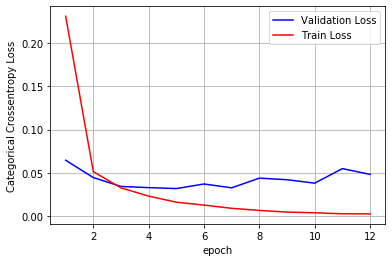

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5 LAYER CNN WIT POOL AND WITHOUT DROPOUT

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.2131 - acc: 0.9350 - val_loss: 0.1056 - val_acc: 0.9658
Epoch 2/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0524 - acc: 0.9840 - val_loss: 0.0282 - val_acc: 0.9893
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0340 - acc: 0.9896 - val_loss: 0.0370 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0253 - acc: 0.9922 - val_loss: 0.0260 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0184 - acc: 0.9942 - val_loss: 0.0259 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0316 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0110 - acc: 0.9965 - val_loss: 0.0319 - val_ac

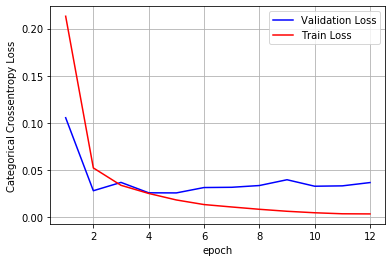

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5 LAYER CNN WIT POOL AND WITH DROPOUT

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.3028 - acc: 0.9058 - val_loss: 0.0607 - val_acc: 0.9808
Epoch 2/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0951 - acc: 0.9725 - val_loss: 0.0372 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0705 - acc: 0.9791 - val_loss: 0.0333 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0589 - acc: 0.9825 - val_loss: 0.0298 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0511 - acc: 0.9849 - val_loss: 0.0278 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0450 - acc: 0.9869 - val_loss: 0.0301 - val_acc: 0.9902
Epoch 7/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0406 - acc: 0.9884 - val_loss: 0.0240 - val_ac

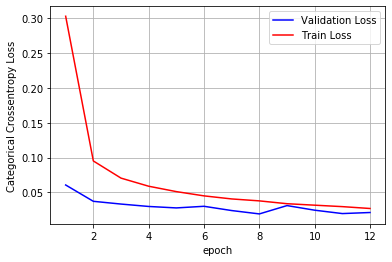

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 LAYERS CNN

## 7 LAYER CNN WITHOUT POOL AND DROPOUT

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(Conv2D(8, (2, 2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.4368 - acc: 0.8587 - val_loss: 0.0953 - val_acc: 0.9720
Epoch 2/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0873 - acc: 0.9744 - val_loss: 0.0527 - val_acc: 0.9839
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0583 - acc: 0.9831 - val_loss: 0.0406 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0452 - acc: 0.9864 - val_loss: 0.0432 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0359 - acc: 0.9894 - val_loss: 0.0341 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0289 - acc: 0.9909 - val_loss: 0.0365 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0253 - acc: 0.9925 - val_loss: 0.0444 - val_ac

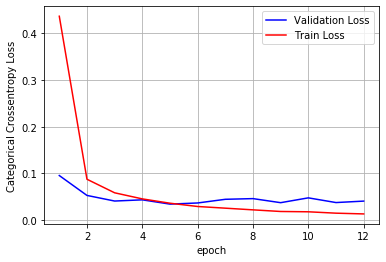

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 7 LAYER CNN WITH POOL AND without DROPOUT

---



In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(Conv2D(8, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.4436 - acc: 0.8556 - val_loss: 0.1067 - val_acc: 0.9656
Epoch 2/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0845 - acc: 0.9745 - val_loss: 0.0581 - val_acc: 0.9813
Epoch 3/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0593 - acc: 0.9818 - val_loss: 0.0571 - val_acc: 0.9822
Epoch 4/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0569 - val_acc: 0.9827
Epoch 5/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0373 - acc: 0.9886 - val_loss: 0.0354 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0314 - acc: 0.9905 - val_loss: 0.0441 - val_acc: 0.9857
Epoch 7/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0278 - acc: 0.9914 - val_loss: 0.0382 - val_ac

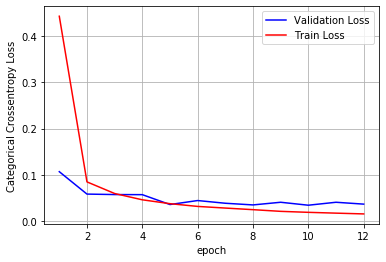

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 7 LAYER CNN WITH POOL AND with DROPOUT

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(Conv2D(8, (2, 2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.4332 - acc: 0.8593 - val_loss: 0.1166 - val_acc: 0.9631
Epoch 2/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0898 - acc: 0.9732 - val_loss: 0.0623 - val_acc: 0.9807
Epoch 3/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0611 - acc: 0.9819 - val_loss: 0.0679 - val_acc: 0.9778
Epoch 4/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0474 - acc: 0.9860 - val_loss: 0.0444 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0384 - acc: 0.9883 - val_loss: 0.0553 - val_acc: 0.9829
Epoch 6/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0311 - acc: 0.9900 - val_loss: 0.0436 - val_acc: 0.9879
Epoch 7/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0263 - acc: 0.9919 - val_loss: 0.0357 - val_a

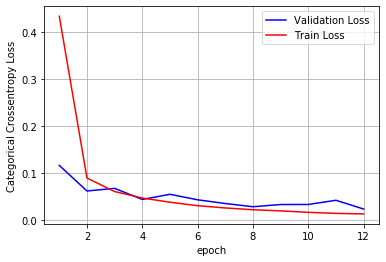

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["layer", "type", "log_loss","accuracy"]

In [0]:

x.add_row(['2_layer','with dropout and max_pool',0.025834757073652508,0.9917])
x.add_row(['3_layer','without dropout and max_pool',0.03626536663422669,0.9913])
x.add_row(['3_layer','without dropout and with max_pool',0.0424302609148956,0.991])
x.add_row(['3_layer','with dropout and with max_pool', 0.02645539062270691,0.9919])
x.add_row(['5_layer','without dropout and  max_pool',0.04818914521079446,0.9911])
x.add_row(['5_layer','without dropout and with max_pool',0.036880395430549655,0.992])
x.add_row(['5_layer','with dropout and with max_pool',0.02116763367687945,0.9924])
x.add_row(['7_layer','without dropout and without max_pool',0.04047466987816365,0.9909])
x.add_row(['7_layer','without dropout and with max_pool',0.03633129313154277,0.9919])
x.add_row(['7_layer','with dropout and with max_pool',0.023981265296157062,0.9922])

In [0]:
print(x)

+---------+--------------------------------------+----------------------+----------+
|  layer  |                 type                 |       log_loss       | accuracy |
+---------+--------------------------------------+----------------------+----------+
| 2_layer |      with dropout and max_pool       | 0.025834757073652508 |  0.9917  |
| 3_layer |     without dropout and max_pool     | 0.03626536663422669  |  0.9913  |
| 3_layer |  without dropout and with max_pool   |  0.0424302609148956  |  0.991   |
| 3_layer |    with dropout and with max_pool    | 0.02645539062270691  |  0.9919  |
| 5_layer |    without dropout and  max_pool     | 0.04818914521079446  |  0.9911  |
| 5_layer |  without dropout and with max_pool   | 0.036880395430549655 |  0.992   |
| 5_layer |    with dropout and with max_pool    | 0.02116763367687945  |  0.9924  |
| 7_layer | without dropout and without max_pool | 0.04047466987816365  |  0.9909  |
| 7_layer |  without dropout and with max_pool   | 0.036331293131

### note
- 3 layer cnn use (5,5),(3,3),(2,2) kernel
- 5 layre cnn use (5,5),(4,4),(3,3),(2,2),(2,2) kernel
- 7 layer cnn use (7,7),(6,6),(5,5),(4,4),(3,3),(2,2),(2,2) kernel